# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
- 3. [Exercises](#toc3_)
	- 3.1. [Question 1 - Edgeworth Box](#toc3_1_) 
	- 3.2. [Question 2 - Market Clearing Error](#toc3_2_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc2_'></a>[Imports](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from inauguralproject import InauguralProjectClass

## 3. <a id='toc3_'></a>[Exercises](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Question 1 - Edgeworth Box](#toc0_)

In [3]:
model = InauguralProjectClass()

In [4]:
def objective_A(x1A,x2A):
    return model.utility_A(x1A,x2A) - model.utility_A(x1A=model.par.w1A, x2A=model.par.w2A)
def objective_B(x1B,x2B):
    return model.utility_B(x1B,x2B) - model.utility_B(x1B=model.par.w1B, x2B=model.par.w2B)

def indifference_curve_A(x1A,x2A,N,x2A_max):
    
    # # a. utility in (y1,y2)
    # u_A = model.utility_A(x1A,x2A)
    
    # b. allocate numpy arrays
    x1A_vec = np.empty(N)
    x2A_vec = np.linspace(1e-8,x2A_max,N)
    
    # c. loop through x2
    for i,x2A in enumerate(x2A_vec):

        x1A_guess = 0 # initial guess
        sol = optimize.root(objective_A, x1A_guess, args=(x2A,)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x1A_vec[i] = sol.x[0]
    
    return x1A_vec,x2A_vec

def indifference_curve_B(x1B,x2B,N,x2B_max):
    
    # a. utility in (y1,y2)
    u_B = model.utility_B(x1B,x2B)
    
    # b. allocate numpy arrays
    x1B_vec = np.empty(N)
    x2B_vec = np.linspace(1e-8,x2B_max,N)
    
    # c. loop through x2
    for i,x2B in enumerate(x2B_vec):

        x1B_guess = 0 # initial guess
        sol = optimize.root(objective_B, x1B_guess, args=(x2B,)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x1B_vec[i] = sol.x[0]
    
    return x1B_vec,x2B_vec

Plotting

In [5]:
x1A=0.8
x2A=0.3
x1A_vec,x2A_vec = indifference_curve_A(x1A,x2A,N=75,x2A_max=1) 

x1B=0.2
x2B=0.7
x1B_vec,x2B_vec = indifference_curve_B(x1B,x2B,N=75,x2B_max=1)

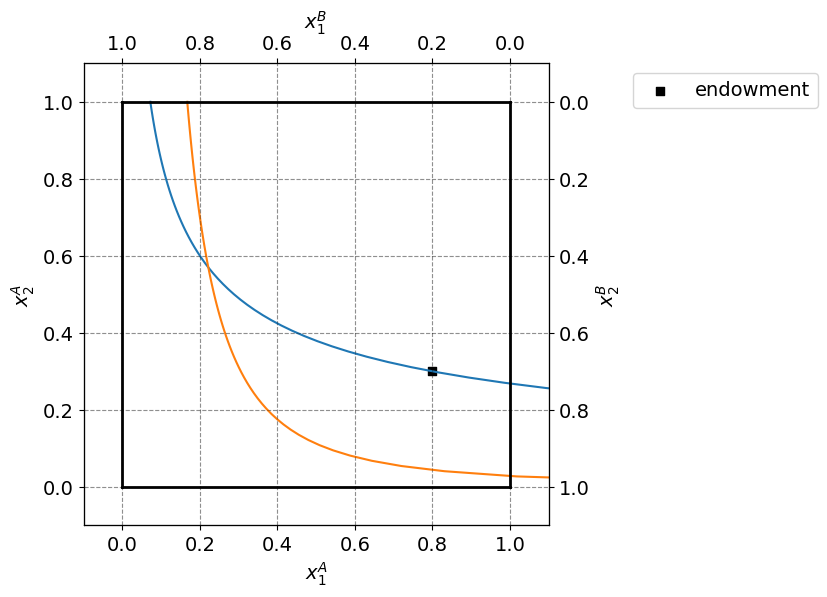

In [6]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.plot(x1A_vec,x2A_vec)
ax_A.plot(x1B_vec,x2B_vec)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

### 3.2. <a id='toc3_2_'></a>[Question 2 - Market clearing error](#toc0_)

Calculating the error in the market clearing condition for p1 in the set P1.

In [7]:
# Define the set P1
N = 75
P1 = [0.5 + 2 * i / N for i in range(N + 1)]

# Calculate market clearing errors
errors = model.calculate_market_clearing_errors(P1)

# Print errors for each p1
for p1, error in zip(P1, errors):
    print(f"p1: {p1:.3f}, Error = {error:.3f}")

p1: 0.500, Error = 0.567
p1: 0.527, Error = 0.509
p1: 0.553, Error = 0.457
p1: 0.580, Error = 0.410
p1: 0.607, Error = 0.367
p1: 0.633, Error = 0.328
p1: 0.660, Error = 0.292
p1: 0.687, Error = 0.259
p1: 0.713, Error = 0.228
p1: 0.740, Error = 0.199
p1: 0.767, Error = 0.172
p1: 0.793, Error = 0.148
p1: 0.820, Error = 0.124
p1: 0.847, Error = 0.103
p1: 0.873, Error = 0.082
p1: 0.900, Error = 0.063
p1: 0.927, Error = 0.045
p1: 0.953, Error = 0.039
p1: 0.980, Error = 0.055
p1: 1.007, Error = 0.070
p1: 1.033, Error = 0.085
p1: 1.060, Error = 0.099
p1: 1.087, Error = 0.112
p1: 1.113, Error = 0.124
p1: 1.140, Error = 0.136
p1: 1.167, Error = 0.148
p1: 1.193, Error = 0.158
p1: 1.220, Error = 0.169
p1: 1.247, Error = 0.179
p1: 1.273, Error = 0.188
p1: 1.300, Error = 0.197
p1: 1.327, Error = 0.206
p1: 1.353, Error = 0.215
p1: 1.380, Error = 0.223
p1: 1.407, Error = 0.230
p1: 1.433, Error = 0.238
p1: 1.460, Error = 0.245
p1: 1.487, Error = 0.252
p1: 1.513, Error = 0.259
p1: 1.540, Error = 0.265


### 3.3. <a id='toc3_3_'></a>[Question 3 - Market clearing price](#toc0_)

In [11]:
# Find market clearing price
market_clearing_price = model.find_market_clearing_price(P1)

# Print market clearing price
print(f"Market clearing price: {market_clearing_price:.3f}")

Market clearing price: 0.953


### 3.4a. <a id='toc3_4_'></a>[Question 4a - p1 in P1](#toc0_)

In [25]:
# print(f"The allocation of x_1^A is: model.demand_A(market_clearing_price)")
print(f"Allocation of good 1 to consumer A: {model.demand_A(market_clearing_price):.3f}")
print(f"Allocation of good 1 to consumer B: {model.demand_B(market_clearing_price):.3f}")

Allocation of good 1 to consumer A: 0.372
Allocation of good 1 to consumer B: 0.623
